# Background

Executives want the HR department to look at our attrition data and see if there are any standout groups, using a number of factors such as which units employees are leaving from, are employees leaving after a certain time, are there links to ethnic background implying possible issues in company culture, whether the attrited are concentrated within a specific salary level, or due to low executive potential. We will dive into all of these different areas.

# Data

- Employee Number: unique identifier for each employee
- Business Unit: the department the employee belongs to
- Gender: the gender of the employee
- Start Date: the date the employee started working for the company
- Country: which country the employee resides
- Ethnicity: the ethnicity of the employee (only given for US employees)
- Band: which salary band the employee is in
- Executive Potential: the rating of how much executive potential an employee has (only for certain salary band ratings)
- Employment Status: whether the employee is still with the company

## Pre-Processing

- First, we begin by importing the libraries needed, and take a look at the data. 
- The file seems to have pulled some empty columns from Excel so we get rid of those.
- The Start Date column also needs to be put in the datetime format so we can use it later.
- Finally we define functions for caluculating the annual attrition percentage, as well as a function for plotting the information.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv(
    r'C:\Users\chris\OneDrive\Documents\Employment Data Set.csv')

#Taking a look at the data set.
print(df.head())
print(df.info())

#Removing columns Unnamed: 9-12 as they contain only null values.
empty = ['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12']
df = df.drop(empty, axis=1)

#Changing Start Date to datetime format.
df['Start Date']= pd.to_datetime(df['Start Date'])

#Setting style for graphs.
plt.style.use('seaborn-colorblind')

   Employee Number      Business Unit  Gender  Start Date        Country  \
0                1               Risk    Male   8/21/2021  United States   
1                2  Business Services  Female   12/3/2021          India   
2                3               Risk  Female  12/30/2021         Canada   
3                4          Marketing  Female    3/2/2022         Mexico   
4                5            Finance    Male  11/30/2021  United States   

  Ethnicity  Band Executive Potential Employment Status  Unnamed: 9  \
0  Hispanic    10                 NaN            Active         NaN   
1       NaN     5                 NaN            Active         NaN   
2       NaN    30                High            Active         NaN   
3       NaN     5                 NaN            Active         NaN   
4     White    15                 NaN            Active         NaN   

   Unnamed: 10  Unnamed: 11  Unnamed: 12  
0          NaN          NaN          NaN  
1          NaN          NaN   

In [3]:
#Defining functions for finding and plotting attrition rates

def attrition_rate(column, df):
    '''This function determines the attrition percentage as well as the 
    percent of total employees grouped by the given column name.
    '''
    
    agg_df = df.groupby(by=[column, 'Employment Status']
                       ).agg({'Employee Number': 'count'})
    agg_df.reset_index(drop=False, inplace=True)
    
    pivot_df = agg_df.pivot(columns=['Employment Status'],
                             index=[column], 
                             values='Employee Number')
    pivot_df.fillna(0, inplace=True)
    
    pivot_df['Total'] = pivot_df['Active'] \
                        + pivot_df['Inactive']
    pivot_df['attrition_pct'] = pivot_df['Inactive'] \
                                / pivot_df['Inactive'].sum() * 100
    pivot_df['percent_of_total'] = pivot_df['Total'] \
                                   / pivot_df['Total'].sum() * 100
    
    return pivot_df

def attrition_graph(rate, category):
    
    x = rate.index
    attrition = rate['attrition_pct']
    pct_total = rate['percent_of_total']
  
    x_axis = np.arange(len(x))
  
    plt.figure(figsize=(8,6))
    plt.bar(
        x_axis - 0.2, attrition, 0.4, label = 'Percent of Attrition')
    plt.bar(
        x_axis + 0.2, pct_total, 0.4, label = 'Percent of Company')
    
    plt.xticks(x_axis, x, rotation=60)
    plt.xlabel(category)
    plt.ylabel("Percentage")
    plt.title("Percentage of Employee Attrition by " + category)
    plt.legend()
    plt.show()

# Attrition by Business Unit

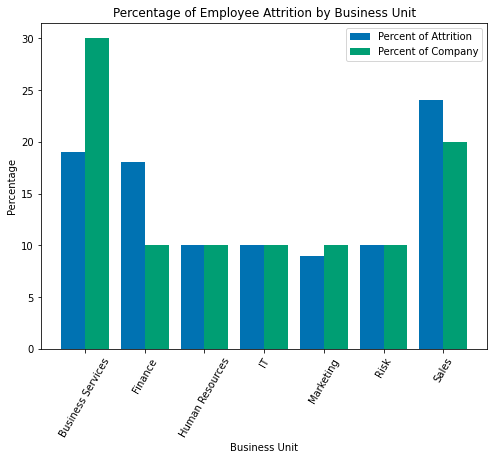

Employment Status,Active,Inactive,Total,attrition_pct,percent_of_total
Business Unit,,,,,
Business Services,2981,19,3000,19.0,30.0
Finance,982,18,1000,18.0,10.0
Human Resources,990,10,1000,10.0,10.0
IT,990,10,1000,10.0,10.0
Marketing,991,9,1000,9.0,10.0
Risk,990,10,1000,10.0,10.0
Sales,1976,24,2000,24.0,20.0


In [4]:
#Exploring attrition rate for each business unit.

rate_by_unit = attrition_rate('Business Unit', df)

attrition_graph(rate_by_unit, 'Business Unit')
attrition_rate('Business Unit', df)

- The Finance department has a particularly high rate of attrition compared to its share of employees.
- The Sales department has a very high attrition rate but sales tends to have very high turnover by nature.

# Attrition by Gender

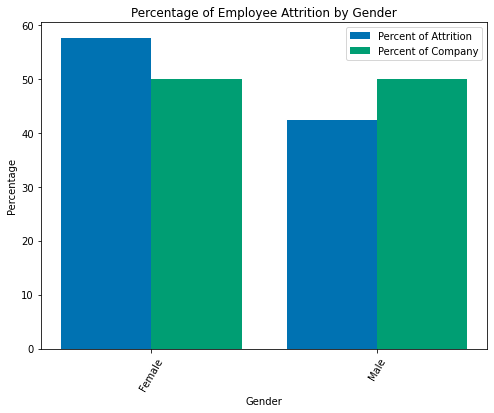

Employment Status,Active,Inactive,Total,attrition_pct,percent_of_total
Gender,,,,,
Female,4893,57,4950,57.575758,50.0
Male,4908,42,4950,42.424242,50.0


In [5]:
#Exploring attrition rate by gender.

rate_by_gender = attrition_rate('Gender', df)

attrition_graph(rate_by_gender, 'Gender')
attrition_rate('Gender', df)

- There appears to be higher attrition amongst female employees.

# Attrition by Tenure

Since there are many starting dates, we group them in categories based on number of years (Today's Date: 7/01/2022).

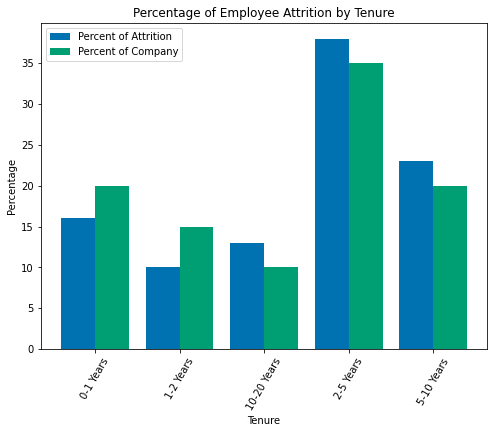

Employment Status,Active,Inactive,Total,attrition_pct,percent_of_total
Tenure,,,,,
0-1 Years,1984,16,2000,16.0,20.00
1-2 Years,1490,10,1500,10.0,15.00
10-20 Years,987,13,1000,13.0,10.00
2-5 Years,3464,38,3502,38.0,35.02
5-10 Years,1975,23,1998,23.0,19.98


In [6]:
#Exploring attrition rate by tenure.

#Grouping employees by tenure ranges.
tenure = []
for value in df["Start Date"]:
    if value >= pd.to_datetime('2021-07-01'):
        tenure.append("0-1 Years")
    elif value < pd.to_datetime('2021-07-01') \
        and value >= pd.to_datetime('2020-07-01'):
            tenure.append("1-2 Years")
    elif value < pd.to_datetime('2020-07-01') \
        and value >= pd.to_datetime('2017-07-01'):
            tenure.append("2-5 Years")
    elif value < pd.to_datetime('2017-07-01') \
        and value >= pd.to_datetime('2012-07-01'):
            tenure.append("5-10 Years")
    elif value < pd.to_datetime('2012-07-01') \
        and value >= pd.to_datetime('2002-07-01'):
            tenure.append("10-20 Years")

df['Tenure'] = tenure

rate_by_tenure = attrition_rate('Tenure', df)
#tenure_order = ['0-1 Years',
#                '1-2 Years',
#                '2-5 Years',
#                '5-10 Years',
#                '10-20 Years']

x = rate_by_tenure.index
attrition = rate_by_tenure['attrition_pct']
pct_total = rate_by_tenure['percent_of_total']
  
x_axis = np.arange(len(x))

plt.figure(figsize=(8,6))
plt.bar(x_axis - 0.2, attrition, 0.4, label = 'Percent of Attrition')
plt.bar(x_axis + 0.2, pct_total, 0.4, label = 'Percent of Company')
  
plt.xticks(x_axis, x, rotation=60)
plt.xlabel("Tenure")
plt.ylabel("Percentage")
plt.title("Percentage of Employee Attrition by Tenure")
plt.legend()
plt.show()

attrition_rate('Tenure', df)

- Attrition seems lowest early career in the 1-2 year range. 0-1 year is higher most likely for people who don't fill well into the role at first.
- Attrition seems to be pretty high in the 2-5 year range.

# Atrrition by Ethnicity

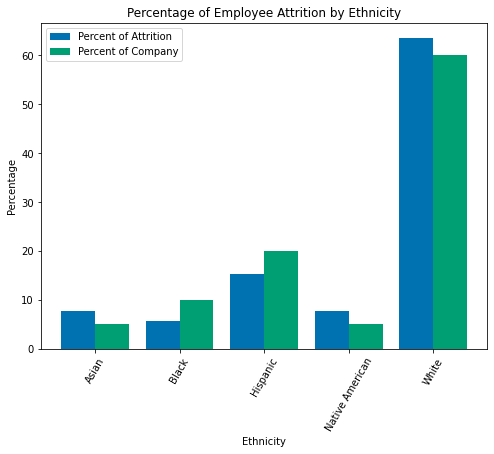

Employment Status,Active,Inactive,Total,attrition_pct,percent_of_total
Ethnicity,,,,,
Asian,246,4,250,7.692308,5.0
Black,497,3,500,5.769231,10.0
Hispanic,992,8,1000,15.384615,20.0
Native American,246,4,250,7.692308,5.0
White,2967,33,3000,63.461538,60.0


In [7]:
#Exploring attrtition rate by ethnicity of US employees.

#Filtering for US employees.
us_employees = df[df['Country'] == 'United States']

rate_by_ethnicity = attrition_rate('Ethnicity', us_employees)

attrition_graph(rate_by_ethnicity, 'Ethnicity')
attrition_rate('Ethnicity', us_employees)

- Attrition is high amongst Asian and Native American employees comparative to their populations in the company.

# Attrition by Salary Band

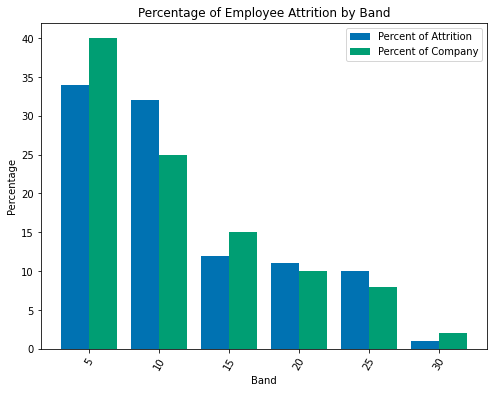

Employment Status,Active,Inactive,Total,attrition_pct,percent_of_total
Band,,,,,
5,3966,34,4000,34.0,40.0
10,2468,32,2500,32.0,25.0
15,1488,12,1500,12.0,15.0
20,989,11,1000,11.0,10.0
25,790,10,800,10.0,8.0
30,199,1,200,1.0,2.0


In [8]:
#Exploring attrition rate by band.

rate_by_band = attrition_rate('Band', df)

attrition_graph(rate_by_band, 'Band')
attrition_rate('Band', df)

- Most of the attrition is in the lower salary bands, perhaps these employees are not earning enough and are actively seeking other opportunities. In particular band 10 has a high attrition rate compared to population.

# Attrition by Executive Potential

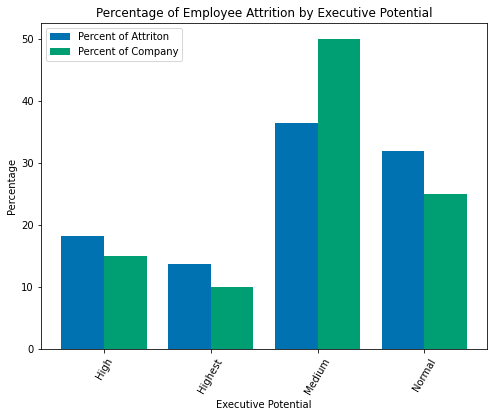

Employment Status,Active,Inactive,Total,attrition_pct,percent_of_total
Executive Potential,,,,,
High,296,4,300,18.181818,15.0
Highest,197,3,200,13.636364,10.0
Medium,992,8,1000,36.363636,50.0
Normal,493,7,500,31.818182,25.0


In [9]:
#Exploring attrition rate by executive potential.

#Filtering for employees where has potential is not null.
has_potential = df[df['Executive Potential'].isna() == False]

by_exec_potential = attrition_rate('Executive Potential', 
                                   has_potential)
                   
#Similar to tenure, we need to reorder the categories here too.
#potential_order = ['Normal', 
#                   'Medium', 
#                   'High', 
#                   'Highest']

x = by_exec_potential.index
attrition = by_exec_potential['attrition_pct']
pct_total = by_exec_potential['percent_of_total']
  
x_axis = np.arange(len(x))

plt.figure(figsize=(8,6))
plt.bar(x_axis - 0.2, attrition, 0.4, label = 'Percent of Attriton')
plt.bar(x_axis + 0.2, pct_total, 0.4, label = 'Percent of Company')
  
plt.xticks(x_axis, x, rotation=60)
plt.xlabel("Executive Potential")
plt.ylabel("Percentage")
plt.title("Percentage of Employee Attrition by Executive Potential")
plt.legend()
plt.show()

attrition_rate('Executive Potential', has_potential)

- Attrition is higher amongst the lowest executive potential rating.